# Audio Filtering on the command line and Python

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

## Introduction


In this post I will look into some filters for audio processing in ffmpeg, sox, and Python. I have recorded a small 6 second audio clip where for the first couple of seconds I was not speaking, but background noise is present.

I had recorded the audio on my Apple device and it was default recorded in `.m4a` format. I convert it to the `wav` format. I use ffmpeg for the same. In addition, I am using two flags: `-v quiet` to reduce the amount of information printed on the console. Second, I am using `-y` to overwrite an existing file with the same name.

In [3]:
!ffmpeg -i Test.m4a Test.wav -v quiet -y

In [4]:
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
Audio("Test.wav")

In [6]:
!ffmpeg -i Test.wav -lavfi showspectrumpic=s=720x540:color='magma' ../images/input-spectogram.png -y -v quiet

![](../images/input-spectogram.png)

As can be seen in the above image, I am speaking somewhere close to 3.70 seconds onwards. However, the audio is pretty noisy before this even though I am not speaking. This is due to the background noise coming in from the fans and the air conditioning system. 





In [7]:
!sox Test.wav -n spectrogram -o ../images/sox-sg.png

![](../images/sox-sg.png)

In [8]:
!sox Test.wav -n rate 32k spectrogram  -o ../images/sox-sg-trimmed.png 

![](../images/sox-sg-trimmed.png)


I'll now get some attributes of the post that are required for processing, such as the recording rate.
## Getting attributes of the recorded file



In [9]:
!ffmpeg -i Test.wav

ffmpeg version 4.4 Copyright (c) 2000-2021 the FFmpeg developers
  built with Apple clang version 12.0.5 (clang-1205.0.22.9)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.4_2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-avresample --enable-videotoolbox
  libavutil      5

As can be seen from the cell above, the recording rate is 48 kHz. We will need this when we do some processing in Python. 

Building a noise profile from first 3 second

In [11]:
!ffmpeg -i Test.wav -ss 0 -to 3.5 -c copy Noise-Test.wav -v quiet -y

In [12]:
Audio('Noise-Test.wav')

In [17]:
!sox Noise-Test.wav -n rate 32k spectrogram  -o ../images/sox-noise.png 

![](../images/sox-noise.png)

In [19]:
!sox Noise-Test.wav -n noiseprof noise.prof

In [21]:
!sox Noise-Test.wav Noise-Test-cleaned.wav noisered noise.prof 0.21

In [22]:
Audio("Noise-Test-cleaned.wav")

In [27]:
!sox Test.wav Test-cleaned-05.wav noisered noise.prof 0.05


!sox Test.wav Test-cleaned-18.wav noisered noise.prof 0.18
!sox Test.wav Test-cleaned-21.wav noisered noise.prof 0.21

In [28]:
Audio("Test-cleaned-05.wav")

In [26]:
Audio("Test-cleaned-18.wav")

In [ ]:
Audio("Test-cleaned-21.wav")

In [29]:
!sox Test-cleaned-21.wav -n rate 32k spectrogram  -o ../images/sox-cleaned-21.png 

![](../images/sox-cleaned-21.png)

In [30]:
!sox Test-cleaned-05.wav -n rate 32k spectrogram  -o ../images/sox-cleaned-05.png 

![](../images/sox-cleaned-05.png)

In [31]:
Audio("Test-audacity.wav")

In [33]:
!sox Test-audacity.wav -n rate 32k spectrogram  -o ../images/sg-audacity.png 

![](../images/sg-audacity.png)

In [51]:
!ffmpeg -i Test.wav -filter:a "highpass=f=300" high-passed.wav -y -v quiet

![](../images/hpf-spectogram.png)

In [11]:
Audio("high-passed.wav")

In [52]:
!sox high-passed.wav -n rate 32k spectrogram  -o ../images/highpass.png 

![](../images/highpass.png)


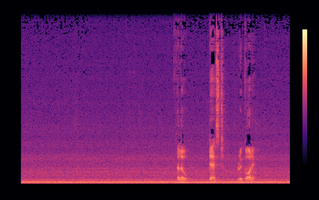
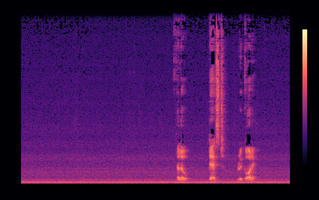
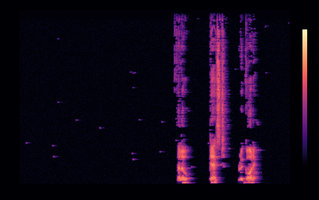
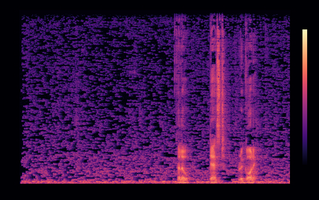
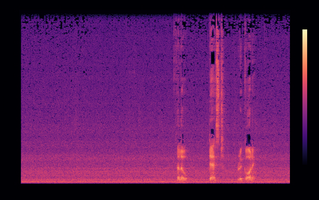

In [54]:
import mediapy

orig  = mediapy.read_image('../images/sox-sg-trimmed.png')
audacity = mediapy.read_image('../images/sg-audacity.png')
sox_21 = mediapy.read_image('../images/sox-cleaned-21.png')
sox_05 = mediapy.read_image('../images/sox-cleaned-05.png')
high_pass_300 = mediapy.read_image('../images/highpass.png')





mediapy.show_images({'Original':orig, 
                     'Audacity':audacity,
                     'Sox:0.21':sox_21,
                    'Sox:0.05':sox_05,
                    'HPF:300': high_pass_300,},
                    cmap='magma', columns=4, height=200 )